<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/ml/Untitled100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

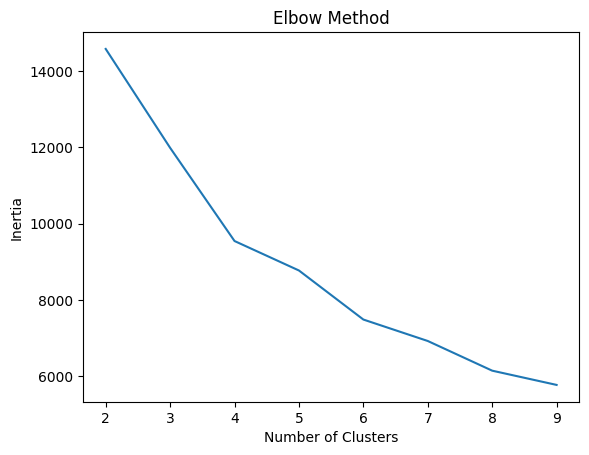

Cluster 0:
 feat_PE                   25.353778
feat_PB                    3.700536
feat_Div_Yield             1.202816
feat_dist_from_ma_50       0.023528
feat_dist_from_ma_200      0.063159
feat_dist_from_max_50     -0.018235
feat_dist_from_min_50      0.076822
feat_dist_from_max_200    -0.031714
feat_dist_from_min_200     0.197795
feat_price_dist_20         0.021142
feat_price_dist_50         0.043110
dtype: float64
Cluster 1:
 feat_PE                   32.909508
feat_PB                    3.767841
feat_Div_Yield             1.251061
feat_dist_from_ma_50       0.057966
feat_dist_from_ma_200      0.135278
feat_dist_from_max_50     -0.014832
feat_dist_from_min_50      0.157600
feat_dist_from_max_200    -0.049136
feat_dist_from_min_200     0.550948
feat_price_dist_20         0.048079
feat_price_dist_50         0.123080
dtype: float64
Cluster 2:
 feat_PE                   20.403878
feat_PB                    2.553265
feat_Div_Yield             1.700408
feat_dist_from_ma_50      -0.12036

<ipython-input-126-c2b7d5791bc6>:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your 10-year Nifty data (assuming a CSV format)
data_r = pd.read_csv('/content/data_fundamental.csv', index_col='Date', parse_dates=True)
data_r.reset_index(inplace=True)

# Feature engineering (optional)
for m in [50, 200]:
    data_r[f'feat_dist_from_ma_{m}'] = data_r['Close']/data_r['Close'].rolling(m).mean()-1

# Distance from n day max/min
for m in [50, 200]:
    data_r[f'feat_dist_from_max_{m}'] = data_r['Close']/data_r['High'].rolling(m).max()-1
    data_r[f'feat_dist_from_min_{m}'] = data_r['Close']/data_r['Low'].rolling(m).min()-1

# Price distance
for m in [20,50]:
    data_r[f'feat_price_dist_{m}'] = data_r['Close']/data_r['Close'].shift(m)-1

data=data_r[(data_r['Date'] >= '2015-01-01') & (data_r['Date'] < '2022-11-30')]
# Select features and scale the data
features = [col for col in data_r.columns if 'feat' in col]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Determine the number of clusters (Elbow Method)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0,n_init='auto')
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal_k based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Analyze and interpret clusters
for i in range(4):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


In [ ]:
'''
import seaborn as sns

sns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',
             markers='+', hue='Cluster', palette='viridis')
plt.show()
'''

"\nimport seaborn as sns\n\nsns.pairplot(data[features + ['Cluster']], diag_kind='kde', kind='scatter',\n             markers='+', hue='Cluster', palette='viridis')\nplt.show()\n"

In [ ]:
# Analyze and interpret clusters
for i in range(4):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:\n", cluster_data[features].mean())


Cluster 0:
 feat_PE                   25.353778
feat_PB                    3.700536
feat_Div_Yield             1.202816
feat_dist_from_ma_50       0.023528
feat_dist_from_ma_200      0.063159
feat_dist_from_max_50     -0.018235
feat_dist_from_min_50      0.076822
feat_dist_from_max_200    -0.031714
feat_dist_from_min_200     0.197795
feat_price_dist_20         0.021142
feat_price_dist_50         0.043110
dtype: float64
Cluster 1:
 feat_PE                   32.909508
feat_PB                    3.767841
feat_Div_Yield             1.251061
feat_dist_from_ma_50       0.057966
feat_dist_from_ma_200      0.135278
feat_dist_from_max_50     -0.014832
feat_dist_from_min_50      0.157600
feat_dist_from_max_200    -0.049136
feat_dist_from_min_200     0.550948
feat_price_dist_20         0.048079
feat_price_dist_50         0.123080
dtype: float64
Cluster 2:
 feat_PE                   20.403878
feat_PB                    2.553265
feat_Div_Yield             1.700408
feat_dist_from_ma_50      -0.12036

In [ ]:
data_s=data

In [ ]:
data_s.reset_index(inplace=True)

In [ ]:
import plotly.express as px



fig = px.scatter(
    data_s,
    x='Date',
    y='Close',
    color='Cluster',
    color_continuous_scale='rdylgn',
    title='Cluster Analysis - Training',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()


In [ ]:
df_test = data_r[data_r['Date'] >= '2022-12-01'].reset_index(drop=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_test[features])

df_test['cluster'] = kmeans.predict(scaled_data)

fig = px.scatter(
    df_test,
    x='Date',
    y='Close',
    color='cluster',
    color_continuous_scale='viridis',
    title='Cluster Analysis - Testing-- LOOK FOR BOTTOMS FORMING',
)

# Customize the axis labels
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Close')

# Show the plot
fig.show()

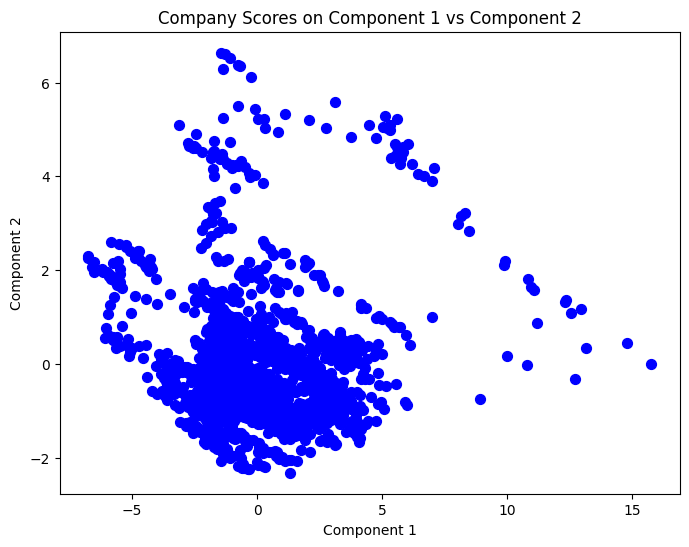

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = data[features]

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create PCA object with 3 components
pca = PCA(n_components=3)

# Fit and transform the data
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame to hold results
df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'])

# Scatter plot of PC1 vs PC2
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c='blue', s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Company Scores on Component 1 vs Component 2')
plt.show()


In [ ]:
# View the 'loadings' to understand how original ratios contribute to components
print(pca.components_)




[[-0.26832754 -0.22497279  0.28451704 -0.35167285 -0.36897086 -0.34304319
  -0.16665468 -0.33671248 -0.27322335 -0.2854919  -0.34876927]
 [ 0.02474518 -0.35204943  0.42591791  0.24069859 -0.17312623 -0.04687097
   0.59768441 -0.30625841  0.2073076   0.29766289  0.14607159]
 [ 0.53726096  0.06575306 -0.05821897 -0.27635533  0.19602799 -0.3737011
   0.1139951  -0.1630013   0.54160826 -0.31661488 -0.12663806]]


In [ ]:
# Calculate explained variance to see importance of each component
print(pca.explained_variance_ratio_)

[0.56607222 0.16770841 0.11522344]


<ipython-input-136-9b46738d0002>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



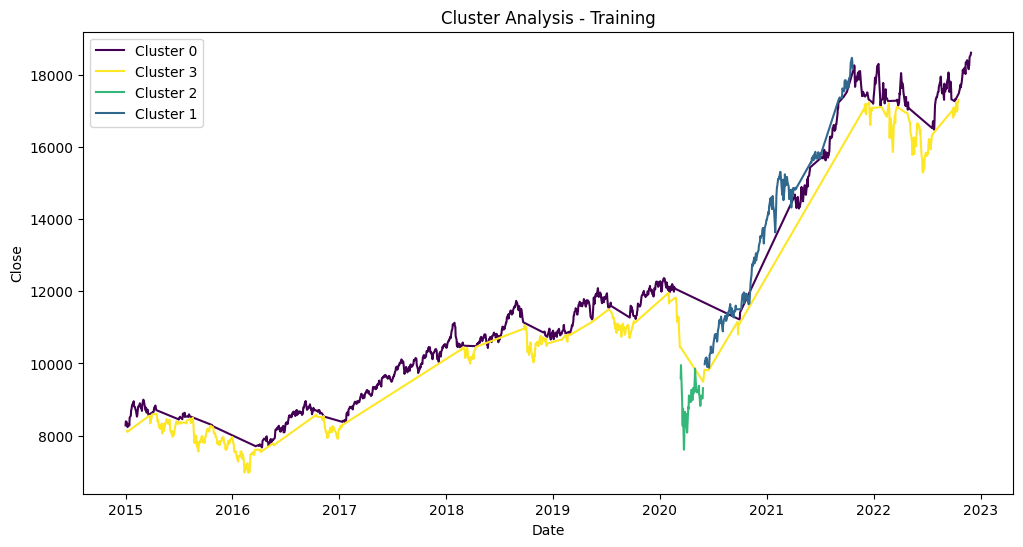

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm  # For the 'viridis' colormap

# ... (Assume your data_s DataFrame exists with 'Date', 'Close', 'Cluster')

# Extract unique clusters in order for sequential coloring
unique_clusters = data_s['Cluster'].unique()

# Get 'viridis' colormap and normalize
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colors from colormap
for i, cluster in enumerate(unique_clusters):
    cluster_data = data_s[data_s['Cluster'] == cluster]
    ax.plot(cluster_data['Date'], cluster_data['Close'],
               c=cmap(normalize(cluster)),
               label=f'Cluster {cluster}')

# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()


<ipython-input-137-8c9dfb6599fe>:1: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



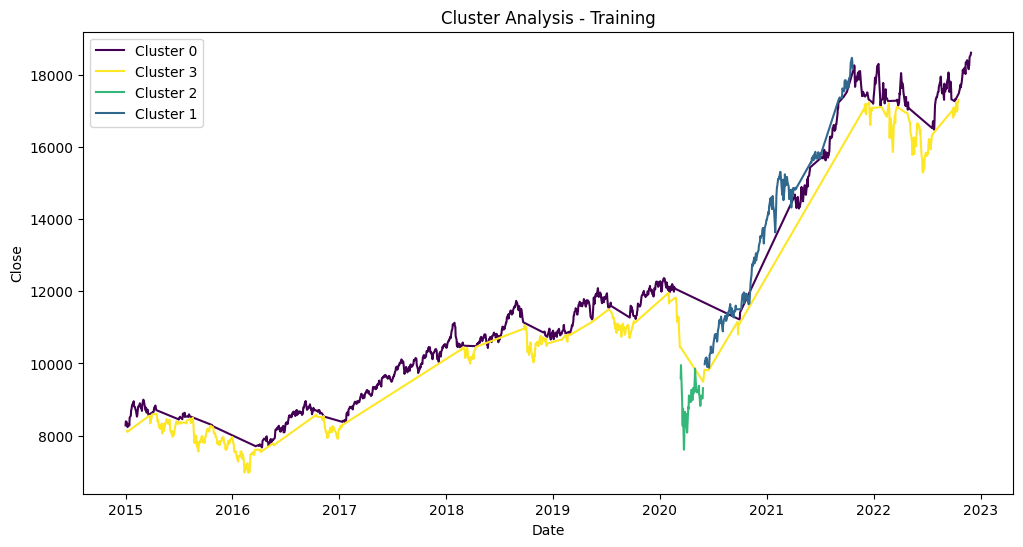

In [ ]:
cmap = cm.get_cmap('viridis')
normalize = plt.Normalize(vmin=unique_clusters.min(), vmax=unique_clusters.max())

fig, ax = plt.subplots(figsize=(12, 6))
# Line plot for each cluster
for i, cluster in enumerate(unique_clusters):
   cluster_data = data_s[data_s['Cluster'] == cluster]
   ax.plot(cluster_data['Date'], cluster_data['Close'],
           c=cmap(normalize(cluster)),
           label=f'Cluster {cluster}')
# Labels and aesthetics
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.set_title('Cluster Analysis - Training')
ax.legend()
plt.show()